<a href="https://colab.research.google.com/github/robertapassarelli/QME_projectwork/blob/master/project_qme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Group H 
# Project work - QME 

In [0]:
import pandas as pd 
import numpy as np
import io 
from collections import defaultdict
from collections import Counter
from google.colab import files # to save and read the csv file 
import matplotlib.pyplot as plt

In [0]:
uploaded = files.upload()
raw_data = pd.read_csv(io.BytesIO(uploaded['eter-export-selected.csv']), sep=";", header = 0, encoding='latin-1')
raw_data.head()

Saving eter-export-selected.csv to eter-export-selected.csv


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ï»¿ETER ID Year,ETER ID,National identifier,English Institution Name,Country Code,Region of establishment (NUTS 2),Geographic coordinates - latitude,Geographic coordinates - longitude,Personnel expenditure (EURO),Non-personnel expenditure (EURO),Expenditure unclassified (EURO),Total Current expenditure (EURO),Capital expenditure (EURO),Basic government allocation (EURO),Total Current revenues (EURO),Research active institution,Students enrolled at ISCED 8 - men,Students enrolled at ISCED 8 - women,Students enrolled ISCED 8 - gender unclassified,Flag Students ISCED 8 - gender,Students enrolled at ISCED 8 - national,Students enrolled at ISCED 8 - foreigner,Students enrolled ISCED 8-citizenship unclassified,Flag Students ISCED 8 - citizenship,Students enrolled at ISCED 8 - resident,Students enrolled at ISCED 8 - mobile,Students enrolled ISCED 8-mobility unclassified,Flag Students ISCED 8 - mobility,Students enrolled at ISCED 8 - Generic programmes and qualifications,Students enrolled at ISCED 8 - Education,Students enrolled at ISCED 8 - Arts and Humanities,"Students enrolled at ISCED 8 - Social sciences, journalism and information","Students enrolled at ISCED 8 - Business, administration and law","Students enrolled at ISCED 8 - Natural sciences, mathematics and statistics",Students enrolled at ISCED 8 - Information and Communication Technologies,"Students enrolled at ISCED 8 - Engineering, manufacturing and construction","Students enrolled at ISCED 8 - Agriculture, forestry, fisheries and veterinary",Students enrolled at ISCED 8 - Health and welfare,Students enrolled at ISCED 8 - Services,Students enrolled ISCED 8 - ISCED-FoE unclassified,...,Graduates at ISCED 8 - men,Graduates at ISCED 8 - women,Graduates at ISCED 8 - gender unclassified,Flag Graduates ISCED 8 - gender,Graduates at ISCED 8 - national,Graduates at ISCED 8 - foreigner,Graduates at ISCED 8 - citizenship unclassified,Flag Graduates ISCED 8 - citizenship,Graduates at ISCED 8 - resident,Graduates at ISCED 8 - mobile,Graduates at ISCED 8 - mobility unclassified,Flag Graduates ISCED 8 - mobility,Graduates at ISCED 8 - Generic programmes and qualifications,Graduates at ISCED 8 - Education,Graduates at ISCED 8 - Arts and Humanities,"Graduates at ISCED 8 - Social sciences, journalism and information","Graduates at ISCED 8 - Business, administration and law","Graduates at ISCED 8 - Natural sciences, mathematics and statistics",Graduates at ISCED 8 - Information and Communication Technologies,"Graduates at ISCED 8 - Engineering, manufacturing and construction","Graduates at ISCED 8 - Agriculture, forestry, fisheries and veterinary",Graduates at ISCED 8 - Health and welfare,Graduates at ISCED 8 - Services,Graduates at ISCED 8 - ISCED-FoE unclassified,Flag Graduates ISCED 8 - ISCED-FoE,Total graduates at ISCED 8,Flag Total graduates ISCED 8,Notes on graduates at ISCED 8,Included in official R&D statistics,R&D Expenditure (EURO),Flag R&D Expenditure,EU-FP Researchers mobility,EU-FP Staff mobility,EU-FP Research training cooperation,Flag Researchers mobility,Notes on research activities,PhD intensity,Flag PhD intensity,Erasmus incoming students - ISCED 8,Erasmus outgoing students - ISCED 8
0,FR0001.2017,FR0001,0060931E,University of Nice Sophia Antipolis,FR,FRL0,"43,7168812836","7,26729398492",m,m,m,m,m,m,m,1,m,m,m,NaN,m,m,m,NaN,m,m,m,NaN,m,m,m,m,m,m,m,m,m,m,m,m,...,m,m,m,NaN,m,m,m,NaN,m,m,m,NaN,m,m,m,m,m,m,m,m,m,m,m,m,NaN,m,NaN,NaN,m,m,NaN,m,m,m,NaN,NaN,m,NaN,m,m
1,FR0002.2017,FR0002,0101060Y,University of Technology of Troyes,FR,FRF2,"48,269146","4,066716",m,m,m,m,m,m,m,1,m,m,m,NaN,m,m,m,NaN,m,m,m,NaN,m,m,m,m,m,m,m,m,m,m,m,m,...,m,m,m,NaN,m,m,m,NaN,m,m,m,NaN,m,m,m,m,m,m,m,m,m,m,m,m,NaN,m,NaN,NaN,m,m,NaN,m,m,m,NaN,NaN,m,NaN,m,m
2,FR0003.2017,FR0003,0130230E,NaN,FR,FRL0,"43,624831","5,111683",m,m,m,m,m,m,m,0,a,a,a,NaN,a,a,a,NaN,a,a,a,NaN,a,a,a,a,a,a,a,a,a,a,a,a,...,a,a,a,NaN,a,a,a,NaN,a,a,a,NaN,a,a,a,a,a,a,a,a,a,a,a,a,NaN,a,NaN,NaN,m,a,NaN,m,m,m,NaN,NaN,a,NaN,m,m
3,FR0004.2017

In [0]:
list_country_code = ['IT', 'SE', 'NO', 'FI', 'PT', 'ES']
raw_data = raw_data.loc[raw_data["Country Code"].isin(list_country_code)]
set(raw_data["Country Code"])

{'ES', 'FI', 'IT', 'NO', 'PT', 'SE'}

In [0]:
raw_data.rename(columns={'ï»¿ETER ID Year':'ETER ID Year'}, inplace=True)

In [0]:
raw_data.columns

Index(['ETER ID Year', 'ETER ID', 'National identifier',
       'English Institution Name', 'Country Code',
       'Region of establishment (NUTS 2)', 'Geographic coordinates - latitude',
       'Geographic coordinates - longitude', 'Personnel expenditure (EURO)',
       'Non-personnel expenditure (EURO)', 'Expenditure unclassified (EURO)',
       'Total Current expenditure (EURO)', 'Capital expenditure (EURO)',
       'Basic government allocation (EURO)', 'Total Current revenues (EURO)',
       'Research active institution', 'Students enrolled at ISCED 8 - men',
       'Students enrolled at ISCED 8 - women',
       'Students enrolled ISCED 8 - gender unclassified',
       'Flag Students ISCED 8 - gender',
       'Students enrolled at ISCED 8 - national',
       'Students enrolled at ISCED 8 - foreigner',
       'Students enrolled ISCED 8-citizenship unclassified',
       'Flag Students ISCED 8 - citizenship',
       'Students enrolled at ISCED 8 - resident',
       'Students enrolled 

In [0]:
variables = ['ETER ID Year', 'ETER ID', 'National identifier', 'English Institution Name',
       'Country Code', 'Region of establishment (NUTS 2)',
       'Students enrolled at ISCED 8 - men',
       'Students enrolled at ISCED 8 - women',
       'Students enrolled ISCED 8 - gender unclassified',
       'Students enrolled at ISCED 8 - national',
       'Students enrolled at ISCED 8 - foreigner',
       'Students enrolled at ISCED 8 - resident',
       'Students enrolled at ISCED 8 - mobile',
       'Total students enrolled at ISCED 8', 'Graduates at ISCED 8 - men',
       'Graduates at ISCED 8 - women',
       'Graduates at ISCED 8 - gender unclassified',
       'Graduates at ISCED 8 - national',
       'Graduates at ISCED 8 - foreigner',
       'Graduates at ISCED 8 - resident', 'Graduates at ISCED 8 - mobile',
       'Total graduates at ISCED 8','Erasmus incoming students - ISCED 8',
       'Erasmus outgoing students - ISCED 8', 'PhD intensity', 
       'Geographic coordinates - latitude',
       'Geographic coordinates - longitude', 'Personnel expenditure (EURO)',
       'Non-personnel expenditure (EURO)', 'Expenditure unclassified (EURO)',
       'Total Current expenditure (EURO)', 'Capital expenditure (EURO)',
       'Basic government allocation (EURO)', 'Total Current revenues (EURO)', 
       'Research active institution', 'Included in official R&D statistics', 'R&D Expenditure (EURO)'
       ]

Accuracy 

In [0]:
missing_values = ['a', 'c', 'm', 's', 'x', 'xc', 'xr', 'nc']
raw_data_acc = raw_data[variables]

# before accuracy 
before_accuracy=defaultdict()
for j in raw_data_acc.columns:
    counter=0
    for i in range(len(list((raw_data_acc[j])))):
        if str(list(raw_data_acc[j])[i]).isdigit():
            if int(list(raw_data_acc[j])[i])>=0:
                counter+=1
        else:
          if list(raw_data_acc[j])[i] in (missing_values):
            counter+=1

    before_accuracy[j]=counter/len(raw_data)

In [0]:
var_check = [
       'Students enrolled at ISCED 8 - men',
       'Students enrolled at ISCED 8 - women',
       'Students enrolled ISCED 8 - gender unclassified',
       'Students enrolled at ISCED 8 - national',
       'Students enrolled at ISCED 8 - foreigner',
       'Students enrolled at ISCED 8 - resident',
       'Students enrolled at ISCED 8 - mobile',
       'Total students enrolled at ISCED 8', 'Graduates at ISCED 8 - men',
       'Graduates at ISCED 8 - women',
       'Graduates at ISCED 8 - gender unclassified',
       'Graduates at ISCED 8 - national',
       'Graduates at ISCED 8 - foreigner',
       'Graduates at ISCED 8 - resident', 'Graduates at ISCED 8 - mobile',
       'Total graduates at ISCED 8','Erasmus incoming students - ISCED 8',
       'Erasmus outgoing students - ISCED 8', 'PhD intensity', 'Personnel expenditure (EURO)',
       'Non-personnel expenditure (EURO)', 'Expenditure unclassified (EURO)',
       'Total Current expenditure (EURO)', 
       'Basic government allocation (EURO)', 'Total Current revenues (EURO)', 
       'Research active institution', 'Included in official R&D statistics', 'R&D Expenditure (EURO)'
       ]

In [0]:
df_before_accuracy = pd.DataFrame.from_dict(before_accuracy, orient='index',
                                            columns=['Before-Accuracy']).loc[var_check, :]
df_before_accuracy

,Before-Accuracy
Students enrolled at ISCED 8 - men,1.000000
Students enrolled at ISCED 8 - women,1.000000
Students enrolled ISCED 8 - gender unclassified,1.000000
Students enrolled at ISCED 8 - national,1.000000
Students enrolled at ISCED 8 - foreigner,1.000000
Students enrolled at ISCED 8 - resident,1.000000
Students enrolled at ISCED 8 - mobile,1.000000
Total students enrolled at ISCED 8,1.000000
Graduates at ISCED 8 - men,1.000000
Graduates at ISCED 8 - women,1.000000


In [0]:
for i in var_check:
    aux_list=[]
    for j in list(raw_data_acc[i]):
        try:
            aux_list.append(str(int(j)))
        except:
            try:
                aux_list.append(str(int(round(float('.'.join((j.split(','))))))))
            except:
                aux_list.append(j)
    raw_data_acc[i]=aux_list

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [0]:
# after accuracy
raw_data_acc = raw_data_acc.replace(['a', 'c', 'm', 's', 'x', 'xc', 'xr'], 0)
raw_data_acc = raw_data_acc.fillna(0)

after_accuracy=defaultdict()
for j in var_check:
    counter=0
    for i in range(len(list((raw_data_acc[j])))):
        if str(list(raw_data_acc[j])[i]).isdigit():
            if int(list(raw_data_acc[j])[i])>=0:
                counter+=1
        else:
            if list(raw_data_acc[j])[i] in (missing_values):
                counter+=1
    after_accuracy[j]=counter/len(raw_data)

In [0]:
df_after_accuracy=pd.DataFrame.from_dict(after_accuracy, orient='index', 
                                         columns=['After-Accuracy']).loc[var_check, :]
df_after_accuracy

,After-Accuracy
Students enrolled at ISCED 8 - men,1.0
Students enrolled at ISCED 8 - women,1.0
Students enrolled ISCED 8 - gender unclassified,1.0
Students enrolled at ISCED 8 - national,1.0
Students enrolled at ISCED 8 - foreigner,1.0
Students enrolled at ISCED 8 - resident,1.0
Students enrolled at ISCED 8 - mobile,1.0
Total students enrolled at ISCED 8,1.0
Graduates at ISCED 8 - men,1.0
Graduates at ISCED 8 - women,1.0


In [0]:
pd.concat([df_before_accuracy, df_after_accuracy], axis=1)

,Before-Accuracy,After-Accuracy
Students enrolled at ISCED 8 - men,1.000000,1.0
Students enrolled at ISCED 8 - women,1.000000,1.0
Students enrolled ISCED 8 - gender unclassified,1.000000,1.0
Students enrolled at ISCED 8 - national,1.000000,1.0
Students enrolled at ISCED 8 - foreigner,1.000000,1.0
Students enrolled at ISCED 8 - resident,1.000000,1.0
Students enrolled at ISCED 8 - mobile,1.000000,1.0
Total students enrolled at ISCED 8,1.000000,1.0
Graduates at ISCED 8 - men,1.000000,1.0
Graduates at ISCED 8 - women,1.000000,1.0


Completeness 

In [0]:
raw_data_completeness = raw_data[variables]

In [0]:
raw_data_completeness.isnull().sum()

ETER ID Year                                        0
ETER ID                                             0
National identifier                                 0
English Institution Name                           18
Country Code                                        0
Region of establishment (NUTS 2)                    0
Students enrolled at ISCED 8 - men                  0
Students enrolled at ISCED 8 - women                0
Students enrolled ISCED 8 - gender unclassified     0
Students enrolled at ISCED 8 - national             0
Students enrolled at ISCED 8 - foreigner            0
Students enrolled at ISCED 8 - resident             0
Students enrolled at ISCED 8 - mobile               0
Total students enrolled at ISCED 8                  0
Graduates at ISCED 8 - men                          0
Graduates at ISCED 8 - women                        0
Graduates at ISCED 8 - gender unclassified          0
Graduates at ISCED 8 - national                     0
Graduates at ISCED 8 - forei

In [0]:
# Missing values replaced witht the string 'None'
missing_values = ['a', 'c', 'm', 's', 'x', 'xc', 'xr', 'nc']
raw_data_completeness = raw_data_completeness.replace(missing_values, 'None') 
raw_data_completeness = raw_data_completeness.fillna('None')

In [0]:
missing = defaultdict()
for i in raw_data_completeness.columns:
    missing[i] = 1 - Counter(raw_data_completeness[i])['None']/sum(Counter(raw_data_completeness[i]).values())
df_compl_before = pd.DataFrame.from_dict(missing, orient='index', 
                                         columns=['Before']).loc[raw_data_completeness.columns,:]
df_compl_before                                         

,Before
ETER ID Year,1.000000
ETER ID,1.000000
National identifier,0.445699
English Institution Name,0.994022
Country Code,1.000000
Region of establishment (NUTS 2),1.000000
Students enrolled at ISCED 8 - men,0.419462
Students enrolled at ISCED 8 - women,0.422783
Students enrolled ISCED 8 - gender unclassified,0.415144
Students enrolled at ISCED 8 - national,0.326470


In [0]:
for i in raw_data_completeness.columns:
    aux_list=[]
    for j in list(raw_data_completeness[i]):
        try:
            aux_list.append(str(int(j)))
        except:
            try:
                aux_list.append(str(int(round(float('.'.join((j.split(','))))))))
            except:
                aux_list.append(j)
    raw_data_completeness[i] = aux_list

In [0]:
raw_data_completeness = raw_data_completeness.replace('None', np.nan) 

df_count = pd.DataFrame(raw_data_completeness.isna().sum(axis=1))
uni_column = raw_data_completeness['English Institution Name']
data_count = pd.concat([df_count,uni_column], axis = 1)
df = data_count.groupby(['English Institution Name'])[0].sum()

In [0]:
df = pd.DataFrame({'English Institution Name':df.index, 'sum_null':df.values})

In [0]:
# Remove the university with low data to improve completeness
to_remove = list((df[df['sum_null']>100])['English Institution Name'])
len(to_remove)

184

In [0]:
data_dropped = raw_data_completeness[~(raw_data_completeness["English Institution Name"].isin(to_remove))]

In [0]:
missing2 = defaultdict()
data_dropped = data_dropped.fillna('None')
for i in data_dropped.columns:
    missing2[i] = 1 - Counter(data_dropped[i])['None']/sum(Counter(data_dropped[i]).values())
df_compl_after = pd.DataFrame.from_dict(missing2, orient='index',
                       columns=['After']).loc[data_dropped.columns,:]
df_compl_after

,After
ETER ID Year,1.000000
ETER ID,1.000000
National identifier,0.486262
English Institution Name,0.990669
Country Code,1.000000
Region of establishment (NUTS 2),1.000000
Students enrolled at ISCED 8 - men,0.637118
Students enrolled at ISCED 8 - women,0.641783
Students enrolled ISCED 8 - gender unclassified,0.631934
Students enrolled at ISCED 8 - national,0.490410


In [0]:
pd.concat([df_compl_before, df_compl_after], axis=1)

,Before,After
ETER ID Year,1.000000,1.000000
ETER ID,1.000000,1.000000
National identifier,0.445699,0.486262
English Institution Name,0.994022,0.990669
Country Code,1.000000,1.000000
Region of establishment (NUTS 2),1.000000,1.000000
Students enrolled at ISCED 8 - men,0.419462,0.637118
Students enrolled at ISCED 8 - women,0.422783,0.641783
Students enrolled ISCED 8 - gender unclassified,0.415144,0.631934
Students enrolled at ISCED 8 - national,0.326470,0.490410


Consistency 

In [0]:
raw_data_cons = data_dropped[variables]
raw_data_cons = raw_data_cons.replace('None', 0) 

In [0]:
l1 = list(raw_data_cons['Students enrolled at ISCED 8 - men'])
l2 = list(raw_data_cons['Students enrolled at ISCED 8 - women'])
l3 = list(raw_data_cons['Students enrolled ISCED 8 - gender unclassified'])
l4 = list(raw_data_cons['Total students enrolled at ISCED 8'])

In [0]:
sum_enr=[]
for i in range(len(l1)):
    sum_enr.append(float(l1[i]) + float(l2[i]) + float(l3[i]) )
    
count=0
for i in range(len(sum_enr)):
    if sum_enr[i]==l4[i]:
        count+=1

In [0]:
count = 0
for i in range(len(sum_enr)):
    if sum_enr[i] >= 0.99*float(l4[i]) and sum_enr[i] <= 1.01*float(l4[i]):
        count+=1
print(float(count/len(sum_enr)))

0.9834110938310006


In [0]:
g1 = list(raw_data_cons['Graduates at ISCED 8 - men'])
g2 = list(raw_data_cons['Graduates at ISCED 8 - women'])
g3 = list(raw_data_cons['Graduates at ISCED 8 - gender unclassified'])
g4 = list(raw_data_cons['Total graduates at ISCED 8'])

In [0]:
sum_g=[]
for i in range(len(l1)):
    sum_g.append(float(g1[i]) + float(g2[i]) + float(g3[i]) )
    
count=0
for i in range(len(sum_g)):
    if sum_g[i]==g4[i]:
        count+=1
print(float(count/len(sum_g))*100)

27.73457750129601


In [0]:
count = 0
for i in range(len(sum_g)):
    if sum_g[i] >= 0.99*float(g4[i]) and sum_g[i] <= 1.01*float(g4[i]):
        count+=1
print(float(count/len(sum_g)))

0.9517884914463453


In [0]:
data_dropped.to_csv('final_dataset.csv')

In [0]:
missing_values = ['a', 'c', 'm', 's', 'x', 'xc', 'xr', 'nc']
data = raw_data
data = data.replace(missing_values, np.nan)
#data['Students enrolled at ISCED 8 - men'] = data['Students enrolled at ISCED 8 - men'].astype(float)
#data['Students enrolled at ISCED 8 - women'] = data['Students enrolled at ISCED 8 - women'].astype(float)
#data['Students enrolled ISCED 8 - gender unclassified'] = data ['Students enrolled ISCED 8 - gender unclassified'].astype(float)
#data['Total students enrolled at ISCED 8'] = data['Total students enrolled at ISCED 8'].astype(float)

In [0]:
for i in variables:
    aux_list=[]
    for j in list(data[i]):
        try:
            aux_list.append(str(int(j)))
        except:
            try:
                aux_list.append(str(int(round(float('.'.join((j.split(','))))))))
            except:
                aux_list.append(j)
    data[i]=aux_list

In [0]:
l11 = list(data['Students enrolled at ISCED 8 - men'])
l21 = list(data['Students enrolled at ISCED 8 - women'])
l31 = list(data['Students enrolled ISCED 8 - gender unclassified'])
l41 = list(data['Total students enrolled at ISCED 8'])

In [0]:
sum_enr1=[]
for i in range(len(l11)):
    sum_enr1.append(float(l11[i]) + float(l21[i]) + float(l31[i])) 

In [0]:
count = 0
for i in range(len(sum_enr1)):
    if sum_enr1[i] >= 0.99*float(l41[i]) and sum_enr1[i] <= 1.01*float(l41[i]):
        count+=1
print(float(count/len(sum_enr1)))

0.41514447027565593


In [0]:
data = raw_data[variables]
data = data.replace(missing_values, np.nan)
g11 = list(data['Graduates at ISCED 8 - men'])
g21 = list(data['Graduates at ISCED 8 - women'])
g31 = list(data['Graduates at ISCED 8 - gender unclassified'])
g41 = list(data['Total graduates at ISCED 8'])
sum_i=[]
for i in range(len(g11)):
    sum_i.append(float(g11[i]) + float(g21[i]) + float(g31[i]) )
count=0
for i in range(len(sum_i)):
    if sum_i[i] >= 0.99*float(g41[i]) and sum_i[i] <= 1.01*float(g41[i]):
        count+=1
print(float(count/len(sum_i)))

0.4420458319495184


In [0]:
#consistency expenditure analysis

In [0]:
variables_exp = ['Total Current expenditure (EURO)', 'R&D Expenditure (EURO)']

In [0]:
raw_data_exp[variables_exp] = raw_data_exp[variables_exp].apply(pd.to_numeric, errors='coerce')

In [0]:
raw_data_exp['difference'] = raw_data_exp['Total Current expenditure (EURO)'] - raw_data_exp['R&D Expenditure (EURO)']

In [0]:
raw_data_exp.shape

In [0]:
raw_data_exp = raw_data_exp[(raw_data_exp['difference'] >= 0) | (raw_data_exp['difference'].isnull())]

In [0]:
raw_data_exp.shape

In [0]:
raw_data_exp.to_csv('last_dataset.csv')

In [0]:
# histogram expenditure analysis

In [0]:
raw_data_exp['Total Current expenditure (EURO)'] = raw_data_exp['Total Current expenditure (EURO)'].astype(int)
raw_data_exp['R&D Expenditure (EURO)'] = raw_data_exp['R&D Expenditure (EURO)'].astype(int)

In [0]:
tot_exp = raw_data_exp.groupby(['Country Code'])['Total Current expenditure (EURO)'].sum()
tot_rd = raw_data_exp.groupby(['Country Code'])['R&D Expenditure (EURO)'].sum()

In [0]:
tot_exp

In [0]:
tot_rd

In [0]:
# Histogram for expenditure
labels = ['ES', 'FI', 'IT', 'NO', 'PT', 'SE']
tot_exp_means = list(tot_exp)
tot_rd_means = list(tot_rd)
x = np.arange(len(labels)) 
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, tot_exp_means, width, label='Total Expenditure')
rects2 = ax.bar(x + width/2, tot_rd_means, width, label='R&D Expenditure')

ax.set_title('Total current expenditure vs R&D expenditure', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [0]:
# Histogram for gender gap

In [0]:
data = raw_data
data = data.replace(missing_values, '0')

In [0]:
data['Students enrolled at ISCED 8 - men'] = data['Students enrolled at ISCED 8 - men'].astype(int)
data['Students enrolled at ISCED 8 - women'] = data['Students enrolled at ISCED 8 - women'].astype(int)

In [0]:
tot_stud_enrolled_men = data.groupby(['Country Code'])['Students enrolled at ISCED 8 - men'].sum()
tot_stud_enrolled_wom = data.groupby(['Country Code'])['Students enrolled at ISCED 8 - women'].sum()

In [0]:
tot_stud_enrolled_men

Country Code
ES    80161
FI    56801
IT    94600
NO    28031
PT    54559
SE    65738
Name: Students enrolled at ISCED 8 - men, dtype: int64

In [0]:
tot_stud_enrolled_wom

Country Code
ES    79073
FI    62533
IT    99123
NO    29701
PT    61995
SE    61152
Name: Students enrolled at ISCED 8 - women, dtype: int64

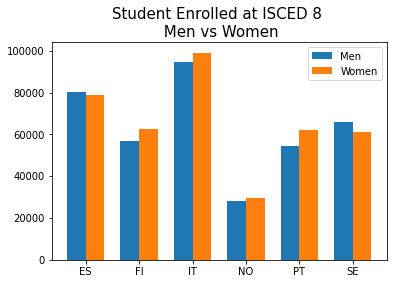

In [0]:
# Histogram for the enrolled student: comparisong between men and women 
labels = ['ES', 'FI', 'IT', 'NO', 'PT', 'SE']
men_means = list(tot_stud_enrolled_men)
women_means = list(tot_stud_enrolled_wom)
x = np.arange(len(labels)) 
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

ax.set_title('Student Enrolled at ISCED 8 \n Men vs Women', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [0]:
data['Graduates at ISCED 8 - men'] = data['Graduates at ISCED 8 - men'].astype(int)
data['Graduates at ISCED 8 - women'] = data['Graduates at ISCED 8 - women'].astype(int)
tot_stud_graduated_men = data.groupby(['Country Code'])['Graduates at ISCED 8 - men'].sum()
tot_stud_graduated_wom = data.groupby(['Country Code'])['Graduates at ISCED 8 - women'].sum()
tot_stud_graduated_wom

Country Code
ES    37079
FI     6043
IT    33920
NO     4134
PT     7446
SE     9601
Name: Graduates at ISCED 8 - women, dtype: int64

In [0]:
tot_stud_graduated_men

Country Code
ES    37288
FI     5578
IT    30759
NO     4320
PT     6159
SE    11373
Name: Graduates at ISCED 8 - men, dtype: int64

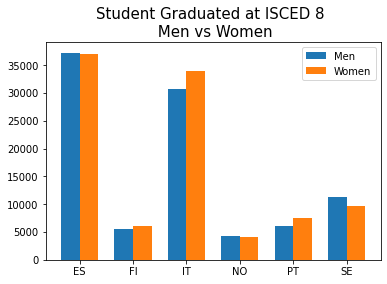

In [0]:
# Histogram for the graduated student: comparisong between men and women 
men_means = list(tot_stud_graduated_men)
women_means = list(tot_stud_graduated_wom)

x = np.arange(len(labels)) 
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

ax.set_title('Student Graduated at ISCED 8 \n Men vs Women', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [0]:
data['Total students enrolled at ISCED 8'] = data['Total students enrolled at ISCED 8'].astype(int)
data['Total graduates at ISCED 8'] = data['Total graduates at ISCED 8'].astype(int)
tot_enrolled = data.groupby(['Country Code'])['Total students enrolled at ISCED 8'].sum()
tot_graduated = data.groupby(['Country Code'])['Total graduates at ISCED 8'].sum()
tot_enrolled

Country Code
ES    159236
FI    119337
IT    193768
NO     57751
PT    116570
SE    126907
Name: Total students enrolled at ISCED 8, dtype: int64

In [0]:
tot_graduated

Country Code
ES    76900
FI    11629
IT    64760
NO     8556
PT    13629
SE    21011
Name: Total graduates at ISCED 8, dtype: int64

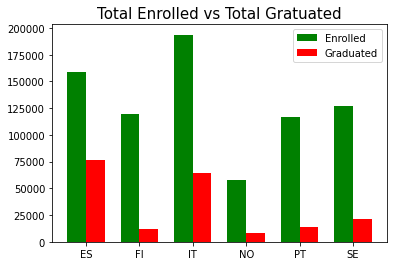

In [0]:
# Histogram for analyze the difference between the total enrolled and the total graduated 
men_means = list(tot_enrolled)
women_means = list(tot_graduated)

x = np.arange(len(labels)) 
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Enrolled', color='g')
rects2 = ax.bar(x + width/2, women_means, width, label='Graduated', color="r")

ax.set_title('Total Enrolled vs Total Gratuated', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

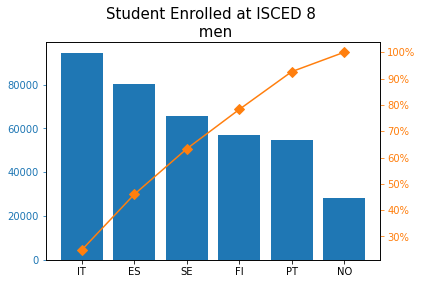

In [0]:
# Pareto chart 
from matplotlib.ticker import PercentFormatter

df = pd.DataFrame({'Enrolled-men': list(tot_stud_enrolled_men)})
df.index = labels
df = df.sort_values(by='Enrolled-men',ascending=False)
df["cumpercentage"] = df["Enrolled-men"].cumsum()/df["Enrolled-men"].sum()*100


fig, ax = plt.subplots()
ax.bar(df.index, df["Enrolled-men"], color="C0")
ax2 = ax.twinx()
ax2.plot(df.index, df["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_title('Student Enrolled at ISCED 8 \n men', fontsize=15)
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

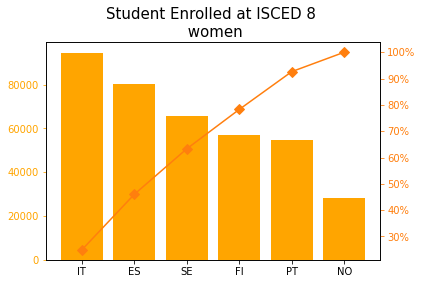

In [0]:
df = pd.DataFrame({'Enrolled-wom': list(tot_stud_enrolled_men)})
df.index = labels
df = df.sort_values(by='Enrolled-wom',ascending=False)
df["cumpercentage"] = df["Enrolled-wom"].cumsum()/df["Enrolled-wom"].sum()*100


fig, ax = plt.subplots()
ax.bar(df.index, df["Enrolled-wom"], color="orange")
ax2 = ax.twinx()
ax2.plot(df.index, df["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_title('Student Enrolled at ISCED 8 \n women', fontsize=15)
ax.tick_params(axis="y", colors="orange")
ax2.tick_params(axis="y", colors="C1")
plt.show()

No handles with labels found to put in legend.


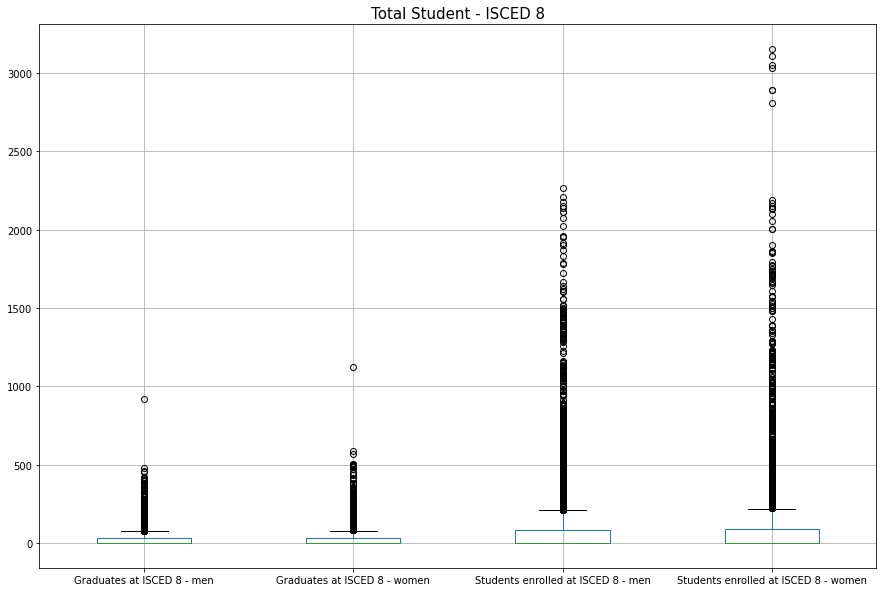

In [0]:
plt.figure(figsize=(15, 10))
boxplot = data.boxplot(column=['Graduates at ISCED 8 - men','Graduates at ISCED 8 - women',
                               'Students enrolled at ISCED 8 - men', 
                               'Students enrolled at ISCED 8 - women'])
plt.title('Total Student - ISCED 8',fontsize=15)
boxplot
ax.set_xticks(np.arange(4))

ax.legend()
plt.show()

In [0]:
# Dendogram
from scipy.cluster import hierarchy
import sys
sys.setrecursionlimit(10000)
hcl_67=data_clean0.groupby(['Country Code'])[['Students enrolled at ISCED 8 - men','Students enrolled at ISCED 8 - women']]

# Calculate the distance between each sample
Z = hierarchy.linkage(hcl_67, 'ward')

plt.figure(figsize=(25,10))
# Plot with Custom leaves
hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=hcl_67.index)
plt.show()

In [0]:
raw_data = pd.read_csv('eter-export-selected.csv', sep=";", header = 0, encoding='utf8')


list_country_code = ['IT', 'SE', 'NO', 'FI', 'PT', 'ES']
raw_data = raw_data.loc[raw_data["Country Code"].isin(list_country_code)]
set(raw_data["Country Code"])
raw_data.rename(columns={'ï»¿ETER ID Year':'ETER ID Year'}, inplace=True)


nuts_list=list(raw_data['Region of establishment (NUTS 2)'].unique())


var_list=['Students enrolled at ISCED 8 - men',
       'Students enrolled at ISCED 8 - women','Students enrolled ISCED 8 - gender unclassified','Students enrolled at ISCED 8 - national',
       'Students enrolled at ISCED 8 - foreigner',
       'Students enrolled ISCED 8-citizenship unclassified',
       'Students enrolled at ISCED 8 - resident',
       'Students enrolled at ISCED 8 - mobile',
       'Students enrolled ISCED 8-mobility unclassified','Students enrolled at ISCED 8 - Generic programmes and qualifications',
       'Students enrolled at ISCED 8 - Education',
       'Students enrolled at ISCED 8 - Arts and Humanities',
       'Students enrolled at ISCED 8 - Social sciences, journalism and information',
       'Students enrolled at ISCED 8 - Business, administration and law',
       'Students enrolled at ISCED 8 - Natural sciences, mathematics and statistics',
       'Students enrolled at ISCED 8 - Information and Communication Technologies',
       'Students enrolled at ISCED 8 - Engineering, manufacturing and construction',
       'Students enrolled at ISCED 8 - Agriculture, forestry, fisheries and veterinary',
       'Students enrolled at ISCED 8 - Health and welfare',
       'Students enrolled at ISCED 8 - Services',
       'Students enrolled ISCED 8 - ISCED-FoE unclassified',
       'Total students enrolled at ISCED 8','Graduates at ISCED 8 - men',
       'Graduates at ISCED 8 - women',
       'Graduates at ISCED 8 - gender unclassified','Graduates at ISCED 8 - foreigner',
       'Graduates at ISCED 8 - citizenship unclassified','Graduates at ISCED 8 - resident', 'Graduates at ISCED 8 - mobile',
       'Graduates at ISCED 8 - mobility unclassified','Graduates at ISCED 8 - Generic programmes and qualifications',
       'Graduates at ISCED 8 - Education',
       'Graduates at ISCED 8 - Arts and Humanities',
       'Graduates at ISCED 8 - Social sciences, journalism and information',
       'Graduates at ISCED 8 - Business, administration and law',
       'Graduates at ISCED 8 - Natural sciences, mathematics and statistics',
       'Graduates at ISCED 8 - Information and Communication Technologies',
       'Graduates at ISCED 8 - Engineering, manufacturing and construction',
       'Graduates at ISCED 8 - Agriculture, forestry, fisheries and veterinary',
       'Graduates at ISCED 8 - Health and welfare',
       'Graduates at ISCED 8 - Services',
       'Graduates at ISCED 8 - ISCED-FoE unclassified']

year_list = list(raw_data['ETER ID Year'].unique())

mean_list=[]

Y = raw_data['ETER ID Year'].values

for i in range(len(Y)):
    if Y[i]=='':
      Y[i]=2016
    if type(Y[i]) is str and Y[i]!='':
        Y[i] = Y[i][7:]
        Y[i] = int(Y[i])

raw_data['ETER ID Year']=Y

year_list = list(raw_data['ETER ID Year'].unique())

print('Computing the means')

for nut in nuts_list:
  print('nut step there are',len(nuts_list))
  for y in year_list:
    l=[nut,y]
    m_data = raw_data[raw_data['Region of establishment (NUTS 2)']==nut]
    m_data = m_data[m_data['ETER ID Year']==y]
    for var in var_list:
      m_datav = m_data[var]
      m_datav = m_datav.replace(['m','a','xr','s','xc','x','c','nc'],np.nan).values
      #m_datav = m_datav[pd.notnull(m_data)].values
      for i in range(len(m_datav)): 
        if type(m_datav[i]) is str:
          m_datav[i] = m_datav[i].replace(',','.')
          m_datav[i] = float(m_datav[i])
      #print(nut,y,var)
      mean = m_datav.mean()
      l.append(mean)
    mean_list.append(l)

print('creating the df')

df=pd.DataFrame(mean_list,columns=['NUTS','Year']+var_list)
print(len(nuts_list)*len(year_list))
print(df.shape)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Computing the means
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step there are 65
nut step the

,NUTS,Year,Students enrolled at ISCED 8 - men,Students enrolled at ISCED 8 - women,Students enrolled ISCED 8 - gender unclassified,Students enrolled at ISCED 8 - national,Students enrolled at ISCED 8 - foreigner,Students enrolled ISCED 8-citizenship unclassified,Students enrolled at ISCED 8 - resident,Students enrolled at ISCED 8 - mobile,Students enrolled ISCED 8-mobility unclassified,Students enrolled at ISCED 8 - Generic programmes and qualifications,Students enrolled at ISCED 8 - Education,Students enrolled at ISCED 8 - Arts and Humanities,"Students enrolled at ISCED 8 - Social sciences, journalism and information","Students enrolled at ISCED 8 - Business, administration and law","Students enrolled at ISCED 8 - Natural sciences, mathematics and statistics",Students enrolled at ISCED 8 - Information and Communication Technologies,"Students enrolled at ISCED 8 - Engineering, manufacturing and construction","Students enrolled at ISCED 8 - Agriculture, forestry, fisheries and veterinary",Students enrolled at ISCED 8 - Health and welfare,Students enrolled at ISCED 8 - Services,Students enrolled ISCED 8 - ISCED-FoE unclassified,Total students enrolled at ISCED 8,Graduates at ISCED 8 - men,Graduates at ISCED 8 - women,Graduates at ISCED 8 - gender unclassified,Graduates at ISCED 8 - foreigner,Graduates at ISCED 8 - citizenship unclassified,Graduates at ISCED 8 - resident,Graduates at ISCED 8 - mobile,Graduates at ISCED 8 - mobility unclassified,Graduates at ISCED 8 - Generic programmes and qualifications,Graduates at ISCED 8 - Education,Graduates at ISCED 8 - Arts and Humanities,"Graduates at ISCED 8 - Social sciences, journalism and information","Graduates at ISCED 8 - Business, administration and law","Graduates at ISCED 8 - Natural sciences, mathematics and statistics",Graduates at ISCED 8 - Information and Communication Technologies,"Graduates at ISCED 8 - Engineering, manufacturing and construction","Graduates at ISCED 8 - Agriculture, forestry, fisheries and veterinary",Graduates at ISCED 8 - Health and welfare,Graduates at ISCED 8 - Services,Graduates at ISCED 8 - ISCED-FoE unclassified
0,ES61,2016,521.8,490.5,0.0,752.0,260.3,0.0,819.5,192.8,0.0,0.0,72.3,159.0,190.2,NaN,218.9,13.0,103.1,52.2,123.2,10.1,NaN,1012.3,118.6,123.5,0.0,56.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ES61,2015,417.6,382.3,0.0,609.1,NaN,NaN,662.6,NaN,NaN,0.0,53.4,124.5,143.6,57.3,181.9,19.5,68.5,46.1,98.0,7.1,0.0,799.9,NaN,NaN,NaN,37.1,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ES61,2014,271.9,260.4,0.0,409.7,122.6,0.0,NaN,NaN,NaN,0.0,37.8,106.2,75.2,36.0,105.2,7.9,65.3,14.3,79.7,4.7,0.0,532.3,75.8,NaN,NaN,32.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ES61,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.0,73.0,0.0,35.6,NaN,NaN,NaN,NaN,0.0,9.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ES61,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
